In [1]:
import itertools
import traceback

import networkx as nx
import numpy as np
import pandas as pd
import pyomo.environ as pe

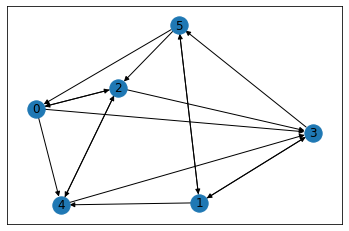

In [4]:
N = 6
p = 0.50
graph = nx.erdos_renyi_graph(N, p, seed=42, directed=True)
nx.draw_networkx(graph)

In [ ]:
N = 6
p = 0.50
graph = nx.erdos_renyi_graph(N, p, seed=42, directed=True)
nx.draw_networkx(graph)

In [6]:
data = {}
np.random.seed(100)
for edge in graph.edges():
    data[edge] = {'weight': np.random.geometric(0.5)}
df = pd.DataFrame.from_dict(data, orient='index')
df.index.names = ['i', 'j']
display(df)

weight
i j        
0 2       2
  3       1
  4       1
1 3       3
  4       1
  5       1
2 0       2
  3       3
  4       1
3 1       2
  5       4
4 2       1
  3       1
5 0       1
  1       1
  2       6

In [7]:
df_cost = df['weight'].reset_index()\
                      .pivot(index='i', columns='j', values='weight')\
                    .  reindex(index=graph.nodes(), columns=graph.nodes())
display(df_cost)

j,0,1,2,3,4,5
i,,,,,,
0,NaN,NaN,2.0,1.0,1.0,NaN
1,NaN,NaN,NaN,3.0,1.0,1.0
2,2.0,NaN,NaN,3.0,1.0,NaN
3,NaN,2.0,NaN,NaN,NaN,4.0
4,NaN,NaN,1.0,1.0,NaN,NaN
5,1.0,1.0,6.0,NaN,NaN,NaN


In [8]:
nodes = set(itertools.chain(*df.index))

model = pe.ConcreteModel()
model.nodes = pe.Set(initialize=nodes)
# initialize as Cartesian product of node set with itself
model.edges = pe.Set(initialize=model.nodes*model.nodes)

    source (type: set).  This WILL potentially lead to nondeterministic
    behavior in Pyomo


In [13]:
nodes = set(itertools.chain(*df.index))

model = pe.ConcreteModel()
model.nodes = pe.Set(initialize=nodes)
# declare as a subset of the Cartesian product
model.edges = pe.Set(within=model.nodes*model.nodes)

len(model.edges)

    source (type: set).  This WILL potentially lead to nondeterministic
    behavior in Pyomo


0

In [16]:
nodes = set(itertools.chain(*df.index))
edges = set(df.index)


model = pe.ConcreteModel()
model.nodes = pe.Set(initialize=nodes)
# declare as a subset of the Cartesian product, initialize as DataFrame index
model.edges = pe.Set(within=model.nodes*model.nodes, initialize=edges)

    source (type: set).  This WILL potentially lead to nondeterministic
    behavior in Pyomo


In [17]:
len(model.edges)

16

In [18]:
df_cost.stack().to_dict()

{(0, 2): 2.0,
 (0, 3): 1.0,
 (0, 4): 1.0,
 (1, 3): 3.0,
 (1, 4): 1.0,
 (1, 5): 1.0,
 (2, 0): 2.0,
 (2, 3): 3.0,
 (2, 4): 1.0,
 (3, 1): 2.0,
 (3, 5): 4.0,
 (4, 2): 1.0,
 (4, 3): 1.0,
 (5, 0): 1.0,
 (5, 1): 1.0,
 (5, 2): 6.0}

In [21]:
nodes = set(itertools.chain(*df.index))

model = pe.ConcreteModel()
model.nodes = pe.Set(initialize=nodes)
model.edges = pe.Set(within=model.nodes*model.nodes, initialize=df.index)
# build parameter from table data (nodes * nodes)
model.cost = pe.Param(model.edges, initialize=df_cost.stack().to_dict())
df_cost.stack().to_dict()
nodes = set(itertools.chain(*df.index))
dict(model.cost)

    source (type: set).  This WILL potentially lead to nondeterministic
    behavior in Pyomo


{(0, 2): 2.0,
 (0, 3): 1.0,
 (0, 4): 1.0,
 (1, 3): 3.0,
 (1, 4): 1.0,
 (1, 5): 1.0,
 (2, 0): 2.0,
 (2, 3): 3.0,
 (2, 4): 1.0,
 (3, 1): 2.0,
 (3, 5): 4.0,
 (4, 2): 1.0,
 (4, 3): 1.0,
 (5, 0): 1.0,
 (5, 1): 1.0,
 (5, 2): 6.0}

In [20]:
model = pe.ConcreteModel()
model.nodes = pe.Set(initialize=nodes)
model.edges = pe.Set(within=model.nodes*model.nodes, initialize=df.index)
# build parameter from flattened data indexed by edge set
model.cost = pe.Param(model.edges, initialize=df['weight'].to_dict())
df['weight'].to_dict()
dict(model.cost)

    source (type: set).  This WILL potentially lead to nondeterministic
    behavior in Pyomo
    source (type: set).  This WILL potentially lead to nondeterministic
    behavior in Pyomo


{(0, 2): 2,
 (0, 3): 1,
 (0, 4): 1,
 (1, 3): 3,
 (1, 4): 1,
 (1, 5): 1,
 (2, 0): 2,
 (2, 3): 3,
 (2, 4): 1,
 (3, 1): 2,
 (3, 5): 4,
 (4, 2): 1,
 (4, 3): 1,
 (5, 0): 1,
 (5, 1): 1,
 (5, 2): 6}

In [22]:
df

weight
i j        
0 2       2
  3       1
  4       1
1 3       3
  4       1
  5       1
2 0       2
  3       3
  4       1
3 1       2
  5       4
4 2       1
  3       1
5 0       1
  1       1
  2       6